<a href="https://colab.research.google.com/github/isaacuribej/Modelos2-Student-Performance/blob/main/02_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Student Performance**
## *Predict student performance in secondary education (high school)*

---


Efraín García Valencia - Isaac Esteban Uribe - Yenny Elizabeth Tombe <br>
**Universidad de Antioquia**

#**0. Importing libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

#**1. Importing the dataset from UCI**

In [2]:
!pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo
# fetch dataset
student_performance = fetch_ucirepo(id=320)

In [4]:
#Original un-modified data for copy and visualization purposes
features = student_performance.data.features  #Original set of features
targets = student_performance.data.targets    #Original set of targets
df = student_performance.data.original        #Full unified data with features and targets

In [5]:
#Dataframes to be modified later
x = features.copy()
y = targets.copy()

In [6]:
#For simplification purposes we are going to leave only one target "G3"
y = y.drop(["G1", "G2"], axis=1)

# **2. Exploratory Data Analysis [EDA]**

## **2.1 Exploring the dataset**

###Metadata of the dataset

In [7]:
student_performance.metadata

{'uci_id': 320,
 'name': 'Student Performance',
 'repository_url': 'https://archive.ics.uci.edu/dataset/320/student+performance',
 'data_url': 'https://archive.ics.uci.edu/static/public/320/data.csv',
 'abstract': 'Predict student performance in secondary education (high school). ',
 'area': 'Social Science',
 'tasks': ['Classification', 'Regression'],
 'characteristics': ['Multivariate'],
 'num_instances': 649,
 'num_features': 30,
 'feature_types': ['Integer'],
 'demographics': ['Sex', 'Age', 'Other', 'Education Level', 'Occupation'],
 'target_col': ['G1', 'G2', 'G3'],
 'index_col': None,
 'has_missing_values': 'no',
 'missing_values_symbol': None,
 'year_of_dataset_creation': 2008,
 'last_updated': 'Fri Jan 05 2024',
 'dataset_doi': '10.24432/C5TG7T',
 'creators': ['Paulo Cortez'],
 'intro_paper': {'title': 'Using data mining to predict secondary school student performance',
  'authors': 'P. Cortez, A. M. G. Silva',
  'published_in': 'Proceedings of 5th Annual Future Business Techno

###Understanding the variables

In [8]:
student_performance.variables

,name,role,type,demographic,description,units,missing_values
0,school,Feature,Categorical,None,student's school (binary: 'GP' - Gabriel Perei...,None,no
1,sex,Feature,Binary,Sex,student's sex (binary: 'F' - female or 'M' - m...,None,no
2,age,Feature,Integer,Age,student's age (numeric: from 15 to 22),None,no
3,address,Feature,Categorical,None,student's home address type (binary: 'U' - urb...,None,no
4,famsize,Feature,Categorical,Other,family size (binary: 'LE3' - less or equal to ...,None,no
5,Pstatus,Feature,Categorical,Other,parent's cohabitation status (binary: 'T' - li...,None,no
6,Medu,Feature,Integer,Education Level,"mother's education (numeric: 0 - none, 1 - pr...",None,no
7,Fedu,Feature,Integer,Education Level,"father's education (numeric: 0 - none, 1 - pr...",None,no
8,Mjob,Feature,Categorical,Occupation,"mother's job (nominal: 'teacher', 'health' car...",None,no
9,Fjob,Feature,Categorical,Occupation,"father's job (nominal: 'teacher', 'health' car...",None,no


###Visualizing the dataset

In [9]:
features

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,3,4,1,1,3,4
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,5,3,3,1,1,3,2
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,4,3,2,2,3,3,6
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,3,2,2,1,1,5,0
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,4,3,2,1,2,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,yes,yes,no,5,4,2,1,2,5,4
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,yes,yes,no,4,3,4,1,1,1,4
646,MS,F,18,U,GT3,T,1,1,other,other,...,yes,no,no,1,1,1,1,1,5,6
647,MS,M,17,U,LE3,T,3,1,services,services,...,yes,yes,no,2,4,5,3,4,2,6


We have 30 features for 649 diferent students

In [10]:
targets

,G1,G2,G3
0,0,11,11
1,9,11,11
2,12,13,12
3,14,14,14
4,11,13,13
...,...,...,...
644,10,11,10
645,15,15,16
646,11,12,9
647,10,10,10


Our target is to predict the students grades, note that:


*   G1: First period grade
*   G2: Second period grade
*   G3: Final grade (Third period)



For this particular task we are only trying to predict G3

##**2.2 Exploring the data**

### Extracting basic information from the data

In [11]:
df['school'].value_counts()

school
GP    423
MS    226
Name: count, dtype: int64

We can see that the data comes from two different schools

In [12]:
df['sex'].value_counts()

sex
F    383
M    266
Name: count, dtype: int64

In [13]:
print("Female: ", (383 / (383 + 266)) * 100, "%")
print("Male: ", (266 / (383 + 266)) * 100, "%")

Female:  59.01386748844376 %
Male:  40.98613251155624 %


We also have a larger proportion of female students in our dataset

In [14]:
df['age'].value_counts()

age
17    179
16    177
18    140
15    112
19     32
20      6
21      2
22      1
Name: count, dtype: int64

The majority of the students are beetween the ages of 15 - 18

### Checking for Dtypes

In [15]:
print(df.dtypes.to_string())

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64


Columns with type "object" contain categorical data that we will need to transform

In [16]:
df.select_dtypes('object').head()

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,no,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,no,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,no,no,yes,yes,no,no


Some are binary data while others contain multiple categories, to solve this issue we will apply label and one hot encoding

### Checking for correlation

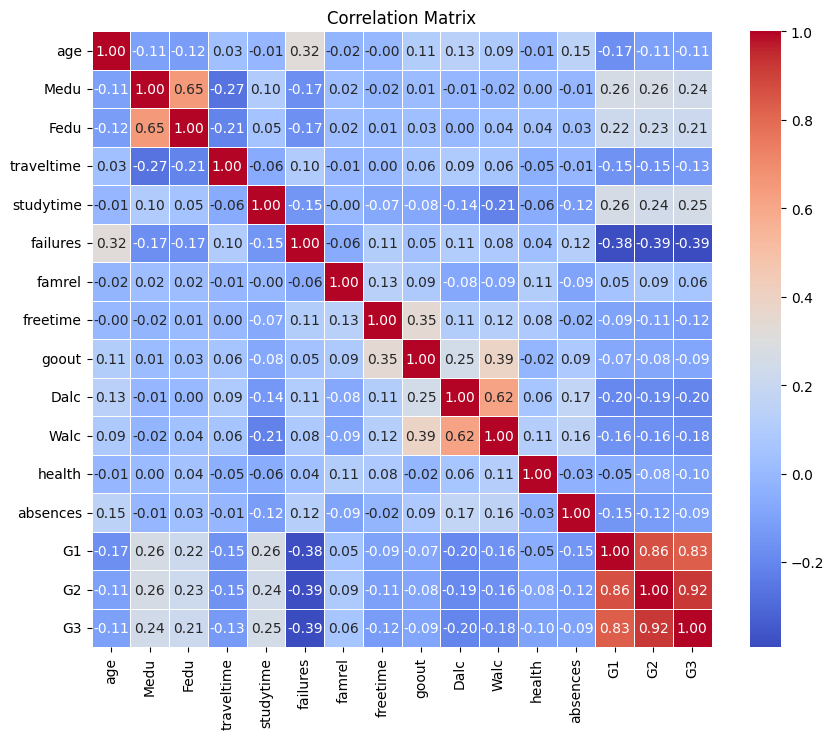

In [17]:
# Exclude non-numeric columns from the dataframe before calculating correlation
numeric_df = df.select_dtypes(include=['number'])

# Calculate correlation matrix
correlation_matrix = numeric_df.corr()

# Plot correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

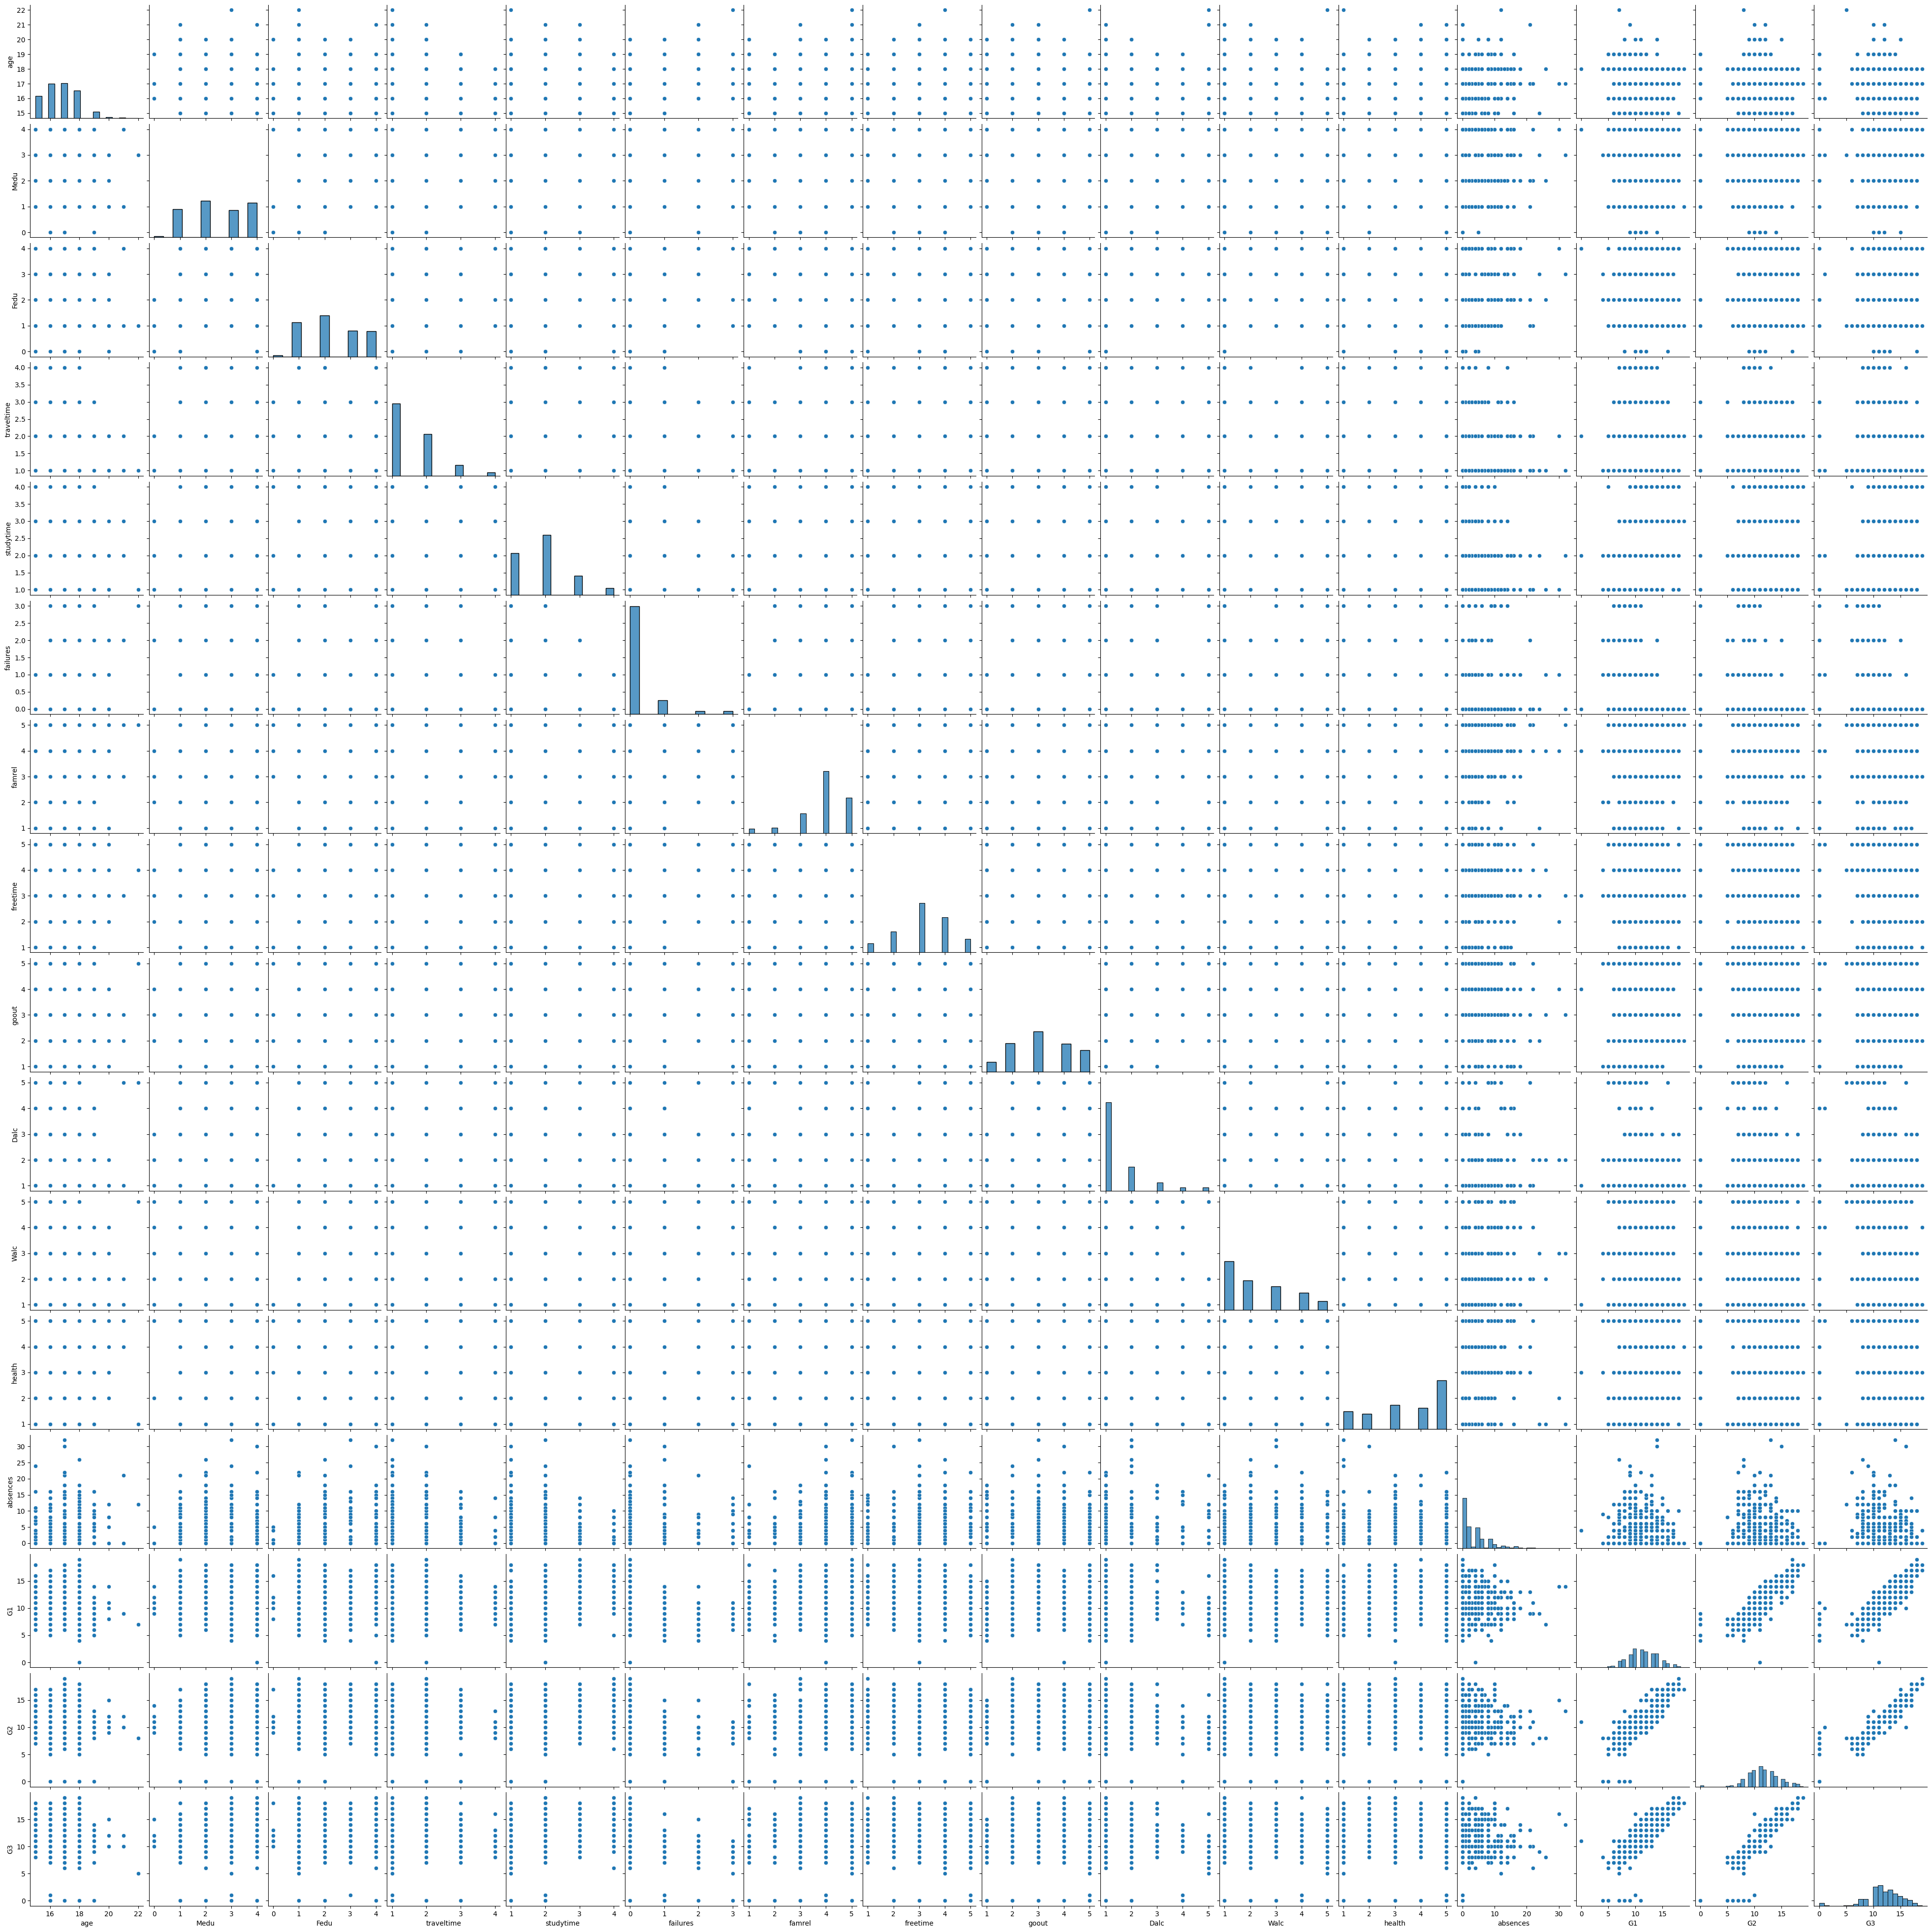

In [18]:
sns.pairplot(df)
plt.show()

### Data summary

In [19]:
df.describe(include=object)

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,649,649,649,649,649,649,649,649,649,649,649,649,649,649,649,649,649
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,no,yes,yes,yes,no
freq,423,383,452,457,569,258,367,285,455,581,398,610,334,521,580,498,410


In [20]:
df.describe().round(4)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.0000,649.0000,649.0000,649.0000,649.0000,649.0000,649.0000,649.0000,649.0000,649.0000,649.0000,649.0000,649.0000,649.0000,649.0000,649.0000
mean,16.7442,2.5146,2.3066,1.5686,1.9307,0.2219,3.9307,3.1803,3.1849,1.5023,2.2804,3.5362,3.6595,11.3991,11.5701,11.9060
std,1.2181,1.1346,1.0999,0.7487,0.8295,0.5932,0.9557,1.0511,1.1758,0.9248,1.2844,1.4463,4.6408,2.7453,2.9136,3.2307
min,15.0000,0.0000,0.0000,1.0000,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000
25%,16.0000,2.0000,1.0000,1.0000,1.0000,0.0000,4.0000,3.0000,2.0000,1.0000,1.0000,2.0000,0.0000,10.0000,10.0000,10.0000
50%,17.0000,2.0000,2.0000,1.0000,2.0000,0.0000,4.0000,3.0000,3.0000,1.0000,2.0000,4.0000,2.0000,11.0000,11.0000,12.0000
75%,18.0000,4.0000,3.0000,2.0000,2.0000,0.0000,5.0000,4.0000,4.0000,2.0000,3.0000,5.0000,6.0000,13.0000,13.0000,14.0000
max,22.0000,4.0000,4.0000,4.0000,4.0000,3.0000,5.0000,5.0000,5.0000,5.0000,5.0000,5.0000,32.0000,19.0000,19.0000,19.0000


## **2.3 Checking for missing data**

In [21]:
missing = pd.DataFrame(df.isnull().sum()).rename(columns={0:'Total'})
missing['Percent']=missing['Total']/len(df)
missing.sort_values('Percent',ascending=False).head(10)

,Total,Percent
school,0,0.0
paid,0,0.0
G2,0,0.0
G1,0,0.0
absences,0,0.0
health,0,0.0
Walc,0,0.0
Dalc,0,0.0
goout,0,0.0
freetime,0,0.0


There seems to be no missing data in our DataSet

##**2.4 Checking for duplicates**

In [22]:
# Check for duplicates
data = df.copy()
duplicate_rows = data[data.duplicated()]
if duplicate_rows.shape[0] == 0:
  print("There are no duplicate rows")
else:
  print("Duplicate rows:", duplicate_rows)

There are no duplicate rows


##**2.5 Checking for outliers**

In [23]:
# Check for posible outliers in numerical columns
check_for_outliers = ["age", "failures", "absences", "G3"]
for numeric_column in check_for_outliers:
  mean = data[numeric_column].mean()
  std_dev = data[numeric_column].std()
  threshold = 3  # Adjust as needed
  outliers = data[(data[numeric_column] - mean).abs() > threshold * std_dev]
  print("Possible outliers: \n", outliers[numeric_column])

Possible outliers: 
 279    22
407    21
413    21
Name: age, dtype: int64
Possible outliers: 
 18     3
78     3
131    3
169    3
170    3
179    3
237    3
279    3
478    3
543    3
557    3
568    3
571    3
610    3
Name: failures, dtype: int64
Possible outliers: 
 150    24
155    22
197    32
212    30
217    21
253    18
256    26
325    22
326    18
397    18
413    21
Name: absences, dtype: int64
Possible outliers: 
 163    0
172    1
440    0
519    0
563    0
567    0
583    0
586    0
597    0
603    0
605    0
610    0
626    0
637    0
639    0
640    0
Name: G3, dtype: int64


In [24]:
df["age"].value_counts()

age
17    179
16    177
18    140
15    112
19     32
20      6
21      2
22      1
Name: count, dtype: int64

In [25]:
df["failures"].value_counts()

failures
0    549
1     70
2     16
3     14
Name: count, dtype: int64

In [26]:
df["absences"].value_counts()

absences
0     244
2     110
4      93
6      49
8      42
10     21
1      12
12     12
5      12
16     10
14      8
9       7
3       7
11      5
18      3
7       3
21      2
15      2
22      2
30      1
26      1
24      1
13      1
32      1
Name: count, dtype: int64

In [27]:
df["G3"].value_counts()

G3
11    104
10     97
13     82
12     72
14     63
15     49
16     36
9      35
8      35
17     29
18     15
0      15
7      10
6       3
19      2
1       1
5       1
Name: count, dtype: int64

#**3. Data transformation**

## **3.1 Label-Enconding**

In [28]:
from sklearn.preprocessing import LabelEncoder

# Columns to label encode
columns_to_encode = ['school', 'sex', 'address', 'famsize', 'Pstatus',
                     'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup',
                     'famsup', 'paid', 'activities', 'nursery', 'higher',
                     'internet', 'romantic']

# Apply label encoding using a loop
for col in columns_to_encode:
    x[col] = x[col].astype('category')
    x[col + '_new'] = LabelEncoder().fit_transform(x[col])

# Drop original categorical columns
x.drop(columns_to_encode, axis=1, inplace=True)

In [29]:
x["guardian_new"].value_counts()

guardian_new
1    455
0    153
2     41
Name: count, dtype: int64

In [30]:
df["guardian"].value_counts()

guardian
mother    455
father    153
other      41
Name: count, dtype: int64

##**3.2 OneHot-Encoding**

In [31]:
# Columns to one-hot encode
columns_to_encode_onehot = ['Mjob_new', 'Fjob_new', 'reason_new', 'guardian_new']

# Apply one-hot encoding using a loop
for col in columns_to_encode_onehot:
    # Convert to category type
    x[col] = x[col].astype('category')
    # Perform one-hot encoding
    enc_data = pd.get_dummies(x[col], prefix=col+'OHE', dtype='int')
    # Join the one-hot encoded columns to the dataframe
    x = pd.concat([x, enc_data], axis=1)

# Drop the original categorical columns
x.drop(columns_to_encode_onehot, axis=1, inplace=True)

In [32]:
x

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,Fjob_newOHE_2,Fjob_newOHE_3,Fjob_newOHE_4,reason_newOHE_0,reason_newOHE_1,reason_newOHE_2,reason_newOHE_3,guardian_newOHE_0,guardian_newOHE_1,guardian_newOHE_2
0,18,4,4,2,2,0,4,3,4,1,...,0,0,1,1,0,0,0,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,0,1,0,0,0,1,0,0
2,15,1,1,1,2,0,4,3,2,2,...,1,0,0,0,0,1,0,0,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,1,0,0,1,0,0,0,1,0
4,16,3,3,1,2,0,4,3,2,1,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,19,2,3,1,3,1,5,4,2,1,...,1,0,0,1,0,0,0,0,1,0
645,18,3,1,1,2,0,4,3,4,1,...,0,1,0,1,0,0,0,0,1,0
646,18,1,1,2,2,0,1,1,1,1,...,1,0,0,1,0,0,0,0,1,0
647,17,3,1,2,1,0,2,4,5,3,...,0,1,0,1,0,0,0,0,1,0


In [33]:
print ("Dimensión de los datos de entrada: ", x.shape[0], 'muestras y', x.shape[1], 'características.')

Dimensión de los datos de entrada:  649 muestras y 43 características.


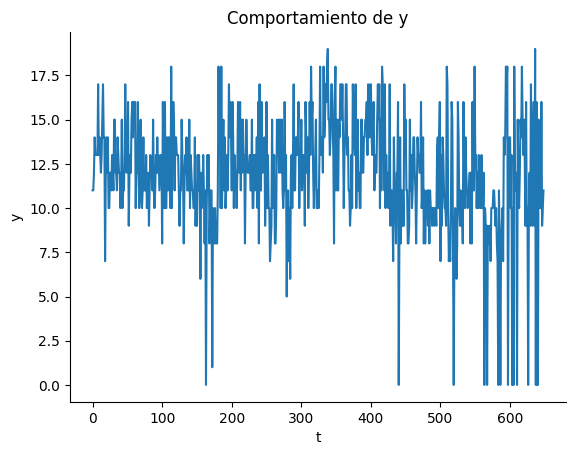

In [34]:
t = np.arange(0, len(y), 1)
fig, ax = plt.subplots()
plt.plot(t,y)
plt.xlabel('t')
plt.ylabel('y')
plt.title('Comportamiento de y')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#**4. Models**

In [43]:
# Data splitting
x = x.to_numpy()
y = y.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=37)

# Reshape y_train and y_test
y_train = y_train.ravel()
y_test = y_test.ravel()

# Define models to use
models = {
    "KNN": KNeighborsRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Support Vector Machine": SVR(),
    "Decision Tree": DecisionTreeRegressor()
}

# Dictionary to store RMSE scores
rmse_scores = {}

# Train the models and obtain evaluation metric
for name, model in models.items():
    model.fit(X_train, y_train)
    # Validate the results using cross-validation
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    rmse_scores[name] = np.sqrt(-scores.mean())

# Compare the results
print("RMSE scores:")
for name, score in rmse_scores.items():
    print(f"{name}: {score:.4f}")

RMSE scores:
KNN: 3.2979
Random Forest: 2.8420
Support Vector Machine: 3.0569
Decision Tree: 3.7065


Random Forest is the model with the best evaluation score using RMSE